In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [1]:
# Import essential Libraries 

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [5]:
# Loading handwritten dataset

(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(X_train)

60000

In [7]:
len(X_test)

10000

In [8]:
X_train[0].shape

(28, 28)

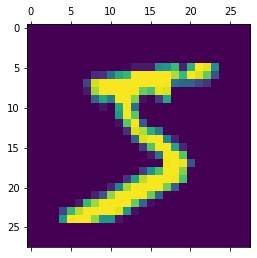

In [9]:
plt.matshow(X_train[0])

In [10]:
y_train[0]

5

In [11]:
# Feature scaling

X_train = X_train / 255
X_test = X_test / 255

In [12]:
# Convertin into 1D array

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
# Model training

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4513 - accuracy: 0.8719
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1262 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0869 - accuracy: 0.9728
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0630 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0488 - accuracy: 0.9852


In [15]:
model.get_weights()

[array([[-0.06890165,  0.02131411, -0.07931593, ..., -0.07477474,
         -0.05905729,  0.03803523],
        [ 0.02737628,  0.01548739, -0.01320302, ...,  0.04897645,
          0.07832439,  0.06520438],
        [-0.0207638 ,  0.06412715, -0.02667054, ...,  0.06846103,
         -0.00243229,  0.02635577],
        ...,
        [ 0.01841462,  0.05369574,  0.07368931, ..., -0.00532352,
         -0.06926138, -0.05303757],
        [ 0.0381889 , -0.04594757, -0.04350844, ...,  0.0716989 ,
         -0.03100914,  0.06088656],
        [ 0.00857691,  0.04550566,  0.05526742, ..., -0.06957624,
          0.01501558, -0.03375331]], dtype=float32),
 array([-0.03065781, -0.04309368, -0.09024932,  0.02094034, -0.08826057,
         0.17568542,  0.00489169,  0.00290978, -0.01242789, -0.16660881,
         0.17966501, -0.05669148,  0.15714319, -0.03980241,  0.14232185,
         0.03996404,  0.12087182,  0.16237448, -0.05824014,  0.11347961,
         0.036507  ,  0.01249828, -0.01377697,  0.10895716, -0.018